# CS316 Project

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("credit_analysis") \
    .getOrCreate()


bash: /home/huukhang1512/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/huukhang1512/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by bash)
23/05/31 01:20:40 WARN Utils: Your hostname, huukhang1512-B550I-AORUS-PRO-AX resolves to a loopback address: 127.0.1.1; using 192.168.0.162 instead (on interface wlp6s0)
23/05/31 01:20:40 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/31 01:20:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/05/31 01:20:41 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/05/31 01:20:41 WARN Utils: Service 'SparkUI' could not bi

In [2]:
df_original=spark.read.format("csv").option("header","true").load('./data.csv', inferSchema=True)

In [3]:
df_original.count()

855969

## We realised there's many rows that have more delimeters than the others, therefore, we decided to remove some record with wrong delimeter before hand

In [4]:
def remove_lines_with_excessive_commas(input_file, output_file):
    with open(input_file, 'r') as csv_input, open(output_file, 'w', newline='') as csv_output:
        first_line = csv_input.readline()
        csv_output.write(first_line)
        number_of_comma = first_line.count(',')
        lines_removed = 0

        for row in csv_input.readlines():
            
            if row.count(',') <= number_of_comma:
                csv_output.write(row)
            else:
                lines_removed += 1

        print(f"{lines_removed} Lines with more than {number_of_comma} commas have been removed.")

# Usage example
input_file = 'data.csv'
output_file = 'output.csv'

In [5]:
remove_lines_with_excessive_commas(input_file, output_file)

51895 Lines with more than 72 commas have been removed.


In [6]:
df=spark.read.format("csv").option("header","true").load('./output.csv', inferSchema=True)

In [7]:
df.count()

804074

In [8]:
df.show(5)

23/05/31 01:20:49 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+---------+---------+-----------+---------------+----------+--------+-----------+-----+---------+--------------------+----------+--------------+----------+-------------------+----------+----------+--------------------+--------------+--------------------+--------+----------+-----+-----------+----------------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+-----------+---------------+---------------+-------------+------------------+----------+-----------------------+------------+---------------+------------+------------------+--------------------------+---------------------------+-----------+----------------+----------------+---------+-------------------------+--------------+------------+-----------+-----------+----------+-----------+-----------+------------------+------------+-------+-----------+-----------+----------+--------+----------------+------+-----------+------------+

# Stage 1: Data exploration

In [9]:
df.dtypes

[('id', 'int'),
 ('member_id', 'int'),
 ('loan_amnt', 'int'),
 ('funded_amnt', 'int'),
 ('funded_amnt_inv', 'double'),
 ('term', 'string'),
 ('int_rate', 'double'),
 ('installment', 'double'),
 ('grade', 'string'),
 ('sub_grade', 'string'),
 ('emp_title', 'string'),
 ('emp_length', 'string'),
 ('home_ownership', 'string'),
 ('annual_inc', 'double'),
 ('verification_status', 'string'),
 ('issue_d', 'string'),
 ('pymnt_plan', 'string'),
 ('desc', 'string'),
 ('purpose', 'string'),
 ('title', 'string'),
 ('zip_code', 'string'),
 ('addr_state', 'string'),
 ('dti', 'double'),
 ('delinq_2yrs', 'int'),
 ('earliest_cr_line', 'string'),
 ('inq_last_6mths', 'int'),
 ('mths_since_last_delinq', 'int'),
 ('mths_since_last_record', 'int'),
 ('open_acc', 'int'),
 ('pub_rec', 'int'),
 ('revol_bal', 'int'),
 ('revol_util', 'double'),
 ('total_acc', 'int'),
 ('initial_list_status', 'string'),
 ('out_prncp', 'double'),
 ('out_prncp_inv', 'double'),
 ('total_pymnt', 'double'),
 ('total_pymnt_inv', 'double

In [10]:
column_to_hist = [item[0] for item in df.dtypes if item[1].startswith('int') or item[1].startswith('double')]

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'member_id'}>,
        <AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt_inv'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>],
       [<AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'mths_since_last_delinq'}>,
        <AxesSubplot:title={'center':'mths_since_last_record'}>,
        <AxesSubplot:title={'center':'open_acc'}>],
       [<AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>,
        <AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'cente

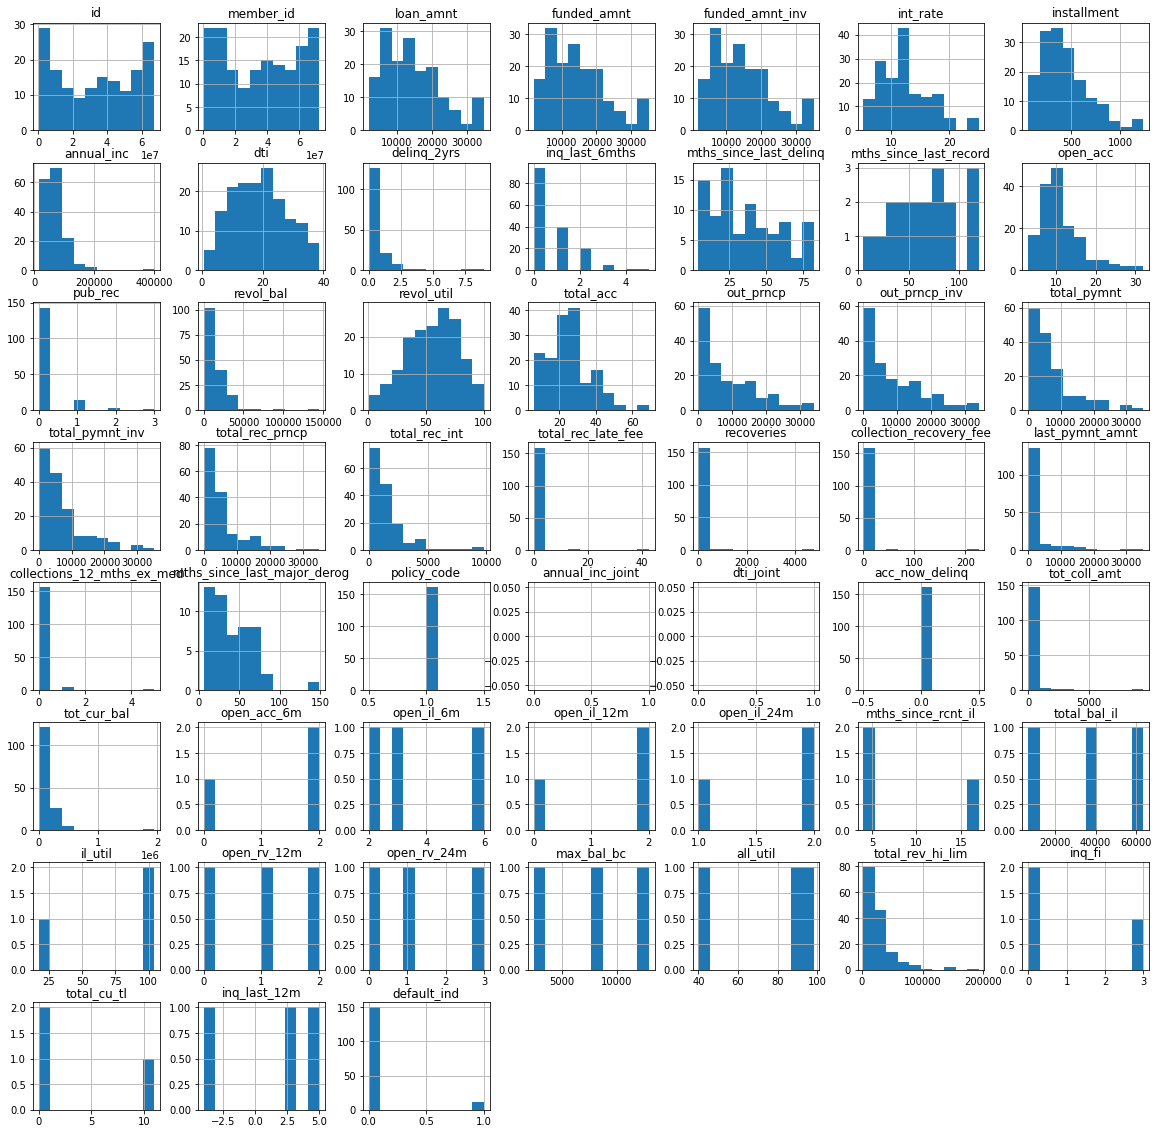

In [11]:
df.select(column_to_hist).sample(withReplacement=False, fraction=0.0002, seed=None).toPandas().hist(figsize=(20,20))

In [12]:
df.columns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 '

From the domain knowledge, it is noticeable that the following fields could be removed as they do not provide great insight for the prediction, and may introduce noise and cause overfitting:

- Unique identifiers such as `id` and `member_id`
- `emp_title`, `desc`, `title` as text description of the loan won't be contribute much for the prediction
- Location identifier columns such as `zip_code` and `addr_state`, as these information do not expected to have a strong influence on loan defaults 
- Date columns such as `earliest_cr_line`, `issue_d`, `last_pymnt_d`, `next_pymnt_d`, `last_credit_pull_d` can be removed, as these data might not be relevant for the prediction model. Moreover, the model to be implemented is expected to predict the upcoming loan, and these date data might not be available.

In [13]:
df = df.drop('id', 'member_id', 'emp_title', 'desc', 'emp_title', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d')

In [14]:
df.show()

+---------+-----------+---------------+----------+--------+-----------+-----+---------+----------+--------------+----------+-------------------+----------+------------------+-----+-----------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+-----------+---------------+---------------+-------------+------------------+----------+-----------------------+---------------+--------------------------+---------------------------+-----------+----------------+----------------+---------+-------------------------+--------------+------------+-----------+-----------+----------+-----------+-----------+------------------+------------+-------+-----------+-----------+----------+--------+----------------+------+-----------+------------+-----------+
|loan_amnt|funded_amnt|funded_amnt_inv|      term|int_rate|installment|grade|sub_grade|emp_length|home_ownership|annual_inc|verification_status|pymnt_plan|  

In [15]:
len(df.columns)

61

In [16]:
df.groupBy(df["policy_code"]).count().sort("count", ascending=False).show()

+-----------+------+
|policy_code| count|
+-----------+------+
|          1|804074|
+-----------+------+



All the policy has the same policy_code. Therefore this column will be dropped

In [17]:
df = df.drop('policy_code')

In [18]:
df.groupBy(df["default_ind"]).count().show()

+-----------+------+
|default_ind| count|
+-----------+------+
|          1| 40660|
|          0|763414|
+-----------+------+



5% of the data are `default`

Visualisation of default diagram

In [19]:
df.groupby(['default_ind']).count().to_pandas_on_spark(index_col='default_ind').plot.pie(y='count')

/home/huukhang1512/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


We will need to resample a training data that will have equal distribution (50/50) of default and non-default rows

In [20]:
df.groupby(['home_ownership']).count().show()


+--------------+------+
|home_ownership| count|
+--------------+------+
|           OWN| 80448|
|          RENT|320233|
|      MORTGAGE|403274|
|         OTHER|    81|
|          NONE|    35|
|           ANY|     3|
+--------------+------+



The majority of borrowers are either paying mortgage or renting a home. Around 10% of borrower actually own the house. Lastly, around 0.0148% of borrowers are in the OTHER, NONE, and ANY category. These remaining fields should be consolidate into one as 'OTHER' field.

In [21]:
df = df.replace(['NONE', 'ANY', '2 years'], 'OTHER', 'home_ownership')

In [22]:
df.select(['home_ownership']).distinct().show()

+--------------+
|home_ownership|
+--------------+
|           OWN|
|          RENT|
|      MORTGAGE|
|         OTHER|
+--------------+



In [23]:
df.groupby(['home_ownership']).count().to_pandas_on_spark(index_col='home_ownership').plot.pie(y='count')

Let's check for the default rate among all home ownership types

In [24]:
df.select(['default_ind','home_ownership']).filter(df['default_ind'] == 1).groupby(['home_ownership']).count().show()

+--------------+-----+
|home_ownership|count|
+--------------+-----+
|           OWN| 3699|
|          RENT|19203|
|      MORTGAGE|17743|
|         OTHER|   15|
+--------------+-----+



Tenants/renter seems more likely to default a loan

In [25]:
df.select(['default_ind','home_ownership']).filter(df['default_ind'] == 0).groupby(['home_ownership']).count().show()

+--------------+------+
|home_ownership| count|
+--------------+------+
|           OWN| 76749|
|          RENT|301030|
|      MORTGAGE|385531|
|         OTHER|   104|
+--------------+------+



## Observation on `null` data fields:

In [26]:
null_dict = {col : df.filter(df[col].isNull()).count() for col in df.columns}

In [27]:
null_dict

{'loan_amnt': 0,
 'funded_amnt': 0,
 'funded_amnt_inv': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_length': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'pymnt_plan': 0,
 'purpose': 0,
 'dti': 0,
 'delinq_2yrs': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 408833,
 'mths_since_last_record': 677326,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 401,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_amnt': 0,
 'collections_12_mths_ex_med': 34,
 'mths_since_last_major_derog': 597237,
 'application_type': 0,
 'annual_inc_joint': 803633,
 'dti_joint': 803633,
 'verification_status_joint': 803633,
 'acc_now_delinq': 0,
 'tot_coll_amt': 45453,
 'tot_cur_bal': 45453,
 'open_acc_6m': 790893,
 'open_il

- all `*_joint` columns (`annual_inc_joint`, `dti_joint`, `verification_status_joint`) have 803633 null values, equivalent to the number of `INDIVIDUAL` `application_type` rows -> Therefore, only the `application_type` of `JOINT` will have these columns filled
- `null` value for `mths_since_last_delinq` indicate that this borrower does not have any delinquencies (does not behind on payment) record.
- `null` value for `mths_since_last_record` indicate that this borrower does not have any public record (does not have any public records of bankruptcy and judgement information)
- `null` value for `mths_since_last_major_derog` indicate that this borrower does not have any worse rating in the last 90 days


In [28]:
df.groupby(['application_type']).count().to_pandas_on_spark(index_col=['application_type']).plot.pie(y='count')

The number of data with `application_type == 'JOINT'`  are heavily underrepresent

Checking if there's any default cases when `application_type == 'JOINT'`

In [29]:
df.filter((df['application_type'] == "JOINT") & (df['default_ind'] == '1')).count()

0

Base on the dataset, virutally no `default` happened when the `application_type == 'JOINT'`!

In [30]:
df_original.filter(df_original['application_type'] == "JOINT").count()

442

We only remove 1 `"JOINT"` account from cleaning the CSV dataset

# TODO: Remove application_type if bad accuracy

Because of high percentage of missing values in the columns related to joint application and the likelihood that the model might predict all the joint application as non-default, columns that indicate the application is `JOINT` will be dropped

In [31]:
df = df.drop("annual_inc_joint", "dti_joint", "verification_status_joint")

In [32]:
df.groupBy(df['verification_status']).count().show()

+-------------------+------+
|verification_status| count|
+-------------------+------+
|           Verified|259501|
|    Source Verified|304870|
|       Not Verified|239703|
+-------------------+------+



In [33]:
df.groupBy(df['verification_status'])\
    .count()\
    .to_pandas_on_spark(index_col=['verification_status'])\
    .plot.pie(y='count')

=> Evenly distributed `verfication_status` accross all accounts 

Let's see the relationship between the number of personal finance inquiries (`inq_fi`) and default rate

In [34]:
df.filter(df['inq_fi'].isNotNull() & (df['default_ind'] == 1)).count()

0

=> All the borrowers with a record of personal finance inquiries virtually not default. If this field is `null`, it indicate that the borrowers never inquiries any personal finance advice from this firm.

Because of the high volume of missing values, this column will be dropped

In [35]:
df = df.drop('inq_fi')

Next, let's see the relationship between the number of credit inquiries in the last 12 months (`inq_last_12m`) and default rate

In [36]:
df.filter(df['inq_last_12m'].isNotNull()).sort('inq_last_12m', ascending=False).show()

+---------+-----------+---------------+----------+--------+-----------+-----+---------+----------+--------------+----------+-------------------+----------+------------------+-----+-----------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+-----------+---------------+---------------+-------------+------------------+----------+-----------------------+---------------+--------------------------+---------------------------+----------------+--------------+------------+-----------+-----------+----------+-----------+-----------+------------------+------------+-------+-----------+-----------+----------+--------+----------------+-----------+------------+-----------+
|loan_amnt|funded_amnt|funded_amnt_inv|      term|int_rate|installment|grade|sub_grade|emp_length|home_ownership|annual_inc|verification_status|pymnt_plan|           purpose|  dti|delinq_2yrs|inq_last_6mths|mths_since_last_delinq

In [37]:
df.filter(df['inq_last_12m'].isNotNull() & (df['default_ind'] == 1)).sort('inq_last_12m', ascending=False).count()

0

In real life, higher number of number of credit inquiries will result in lower result credit, making this loan has a higher chance of default (https://www.canstar.com.au/credit-score/do-credit-checks-affect-your-credit-score/). However it is the opposite with this dataset, as more credit inquiries result in no default rate!

In [38]:
df = df.drop('inq_last_12m')

For the rest of the high number of missing values columns, they will also be dropped.

In [39]:
df = df.drop('open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_cu_tl', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog')

In [40]:
{col : df.filter(df[col].isNull()).count() for col in df.columns}

{'loan_amnt': 0,
 'funded_amnt': 0,
 'funded_amnt_inv': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_length': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'pymnt_plan': 0,
 'purpose': 0,
 'dti': 0,
 'delinq_2yrs': 0,
 'inq_last_6mths': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 401,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_amnt': 0,
 'collections_12_mths_ex_med': 34,
 'application_type': 0,
 'acc_now_delinq': 0,
 'tot_coll_amt': 45453,
 'tot_cur_bal': 45453,
 'total_rev_hi_lim': 45453,
 'default_ind': 0}

### Impute the remaining null data

In [42]:
from pyspark.ml.feature import Imputer
imputer = Imputer(
    inputCols=['tot_coll_amt', 'total_rev_hi_lim', 'tot_cur_bal', 'revol_util', 'collections_12_mths_ex_med'],
    outputCols=['tot_coll_amt', 'total_rev_hi_lim', 'tot_cur_bal', 'revol_util', 'collections_12_mths_ex_med']
)

df = imputer.setStrategy("median").fit(df).transform(df)

In [44]:
df.show()

+---------+-----------+---------------+----------+--------+-----------+-----+---------+----------+--------------+----------+-------------------+----------+------------------+-----+-----------+--------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+-----------+---------------+---------------+-------------+------------------+----------+-----------------------+---------------+--------------------------+----------------+--------------+------------+-----------+----------------+-----------+
|loan_amnt|funded_amnt|funded_amnt_inv|      term|int_rate|installment|grade|sub_grade|emp_length|home_ownership|annual_inc|verification_status|pymnt_plan|           purpose|  dti|delinq_2yrs|inq_last_6mths|open_acc|pub_rec|revol_bal|revol_util|total_acc|initial_list_status|out_prncp|out_prncp_inv|total_pymnt|total_pymnt_inv|total_rec_prncp|total_rec_int|total_rec_late_fee|recoveries|collection_recovery_fee|last_pymnt_amnt|collections_12_mths_ex_med|appli

# Stage 2: Predictive analysis 

## Process the training/testing data

In [51]:
(X_train, X_val, X_test) = df.randomSplit([0.6, 0.2, 0.2], seed=42)

In [52]:
(y_train, y_val, y_test) = [
    X_train.select(['default_ind']),
    X_val.select(['default_ind']),
    X_test.select(['default_ind'])
]

## Process One (3 ML Models with Spark ML)

## Process Two (3 ML Models with TensorFlow and Keras)